<a href="https://colab.research.google.com/github/Prakharprasun/Stock-Predictor-vMLPP1/blob/main/Stock_Predictor_vMLPP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#By: Prakhar Prasun

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [ ]:
#using quandl for getting data

In [ ]:
!pip install quandl
import quandl
data= quandl.get("NSE/TATAGLOBAL")

In [ ]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


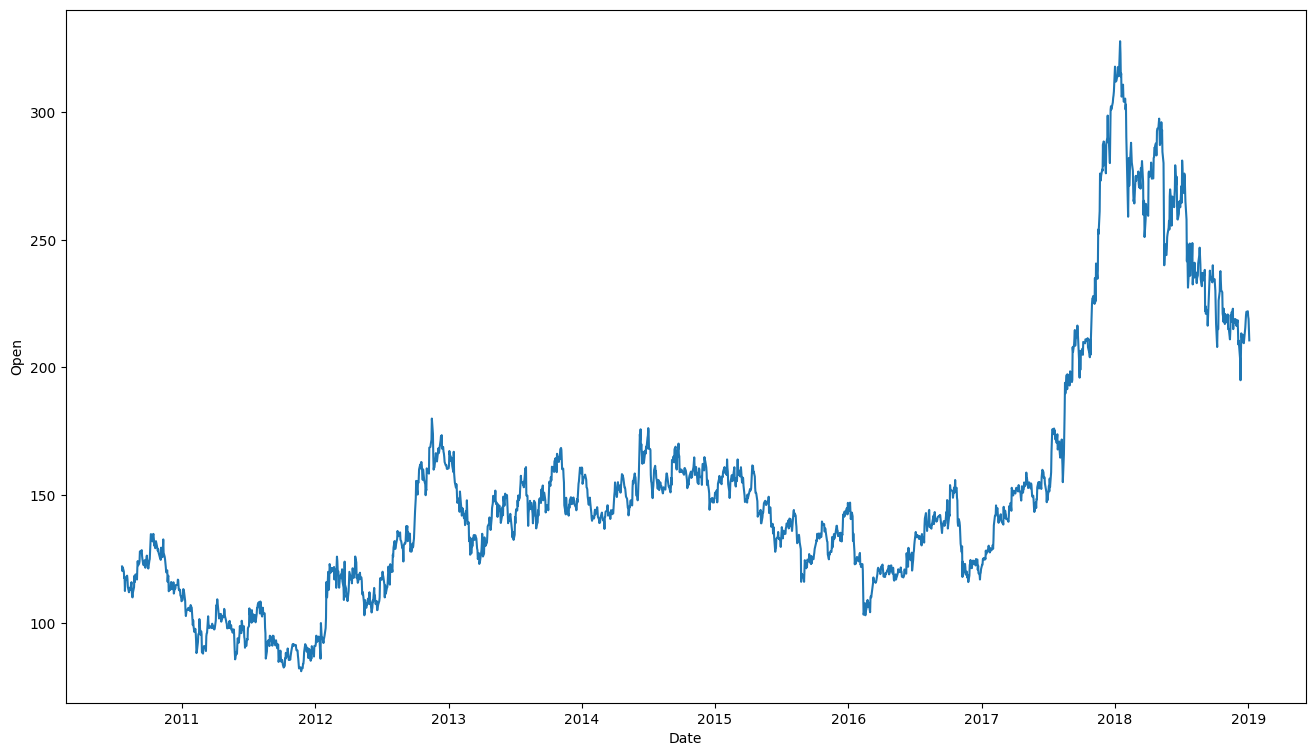

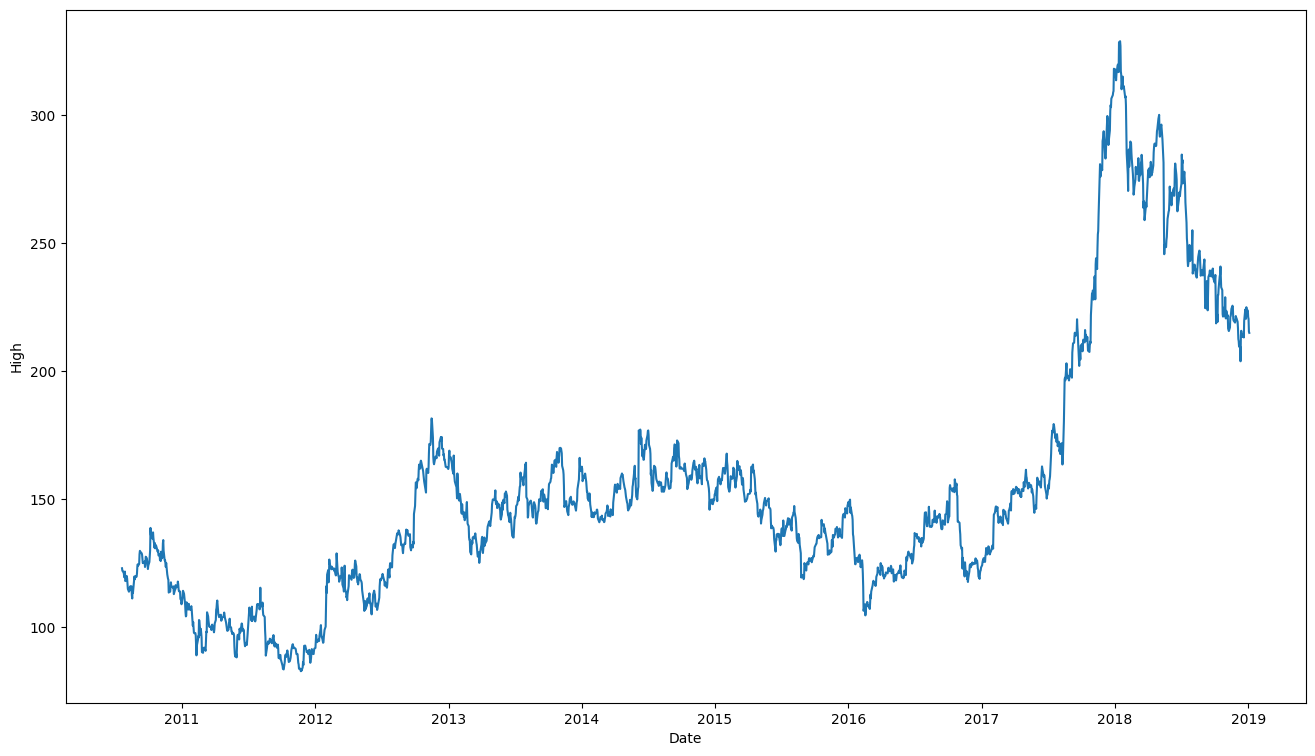

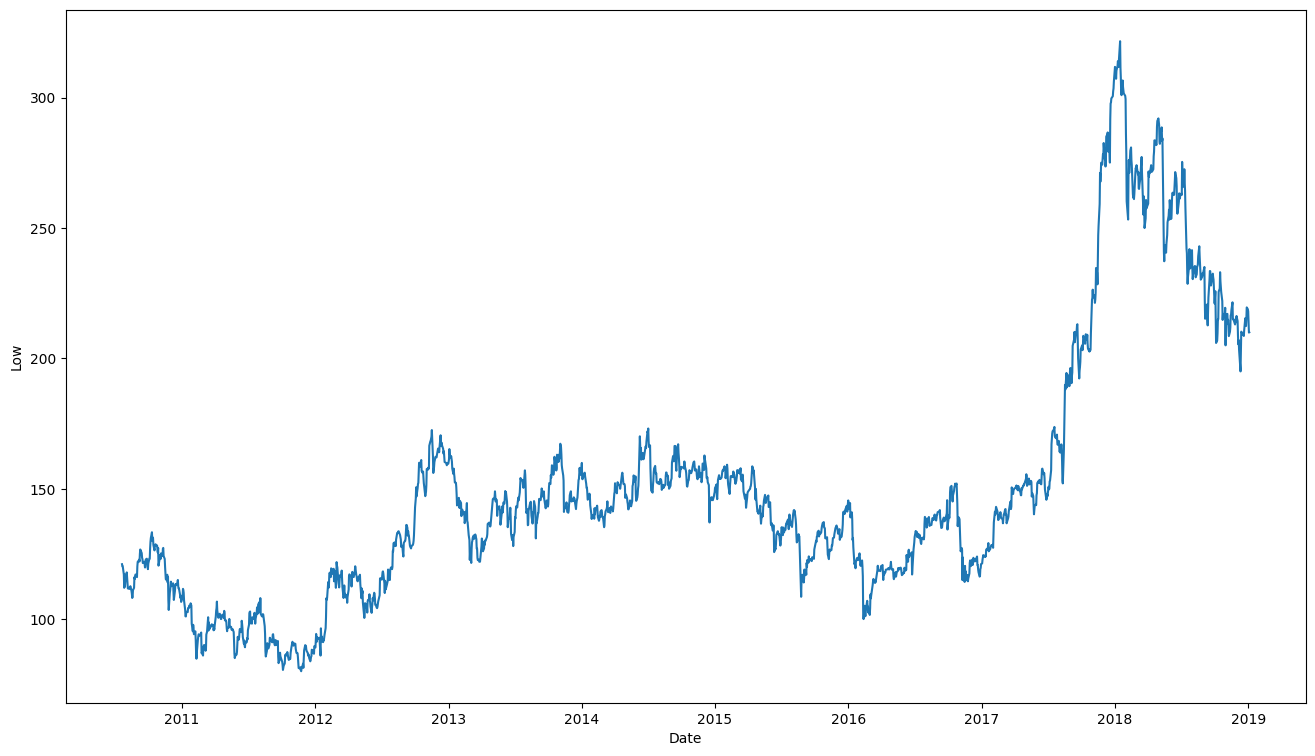

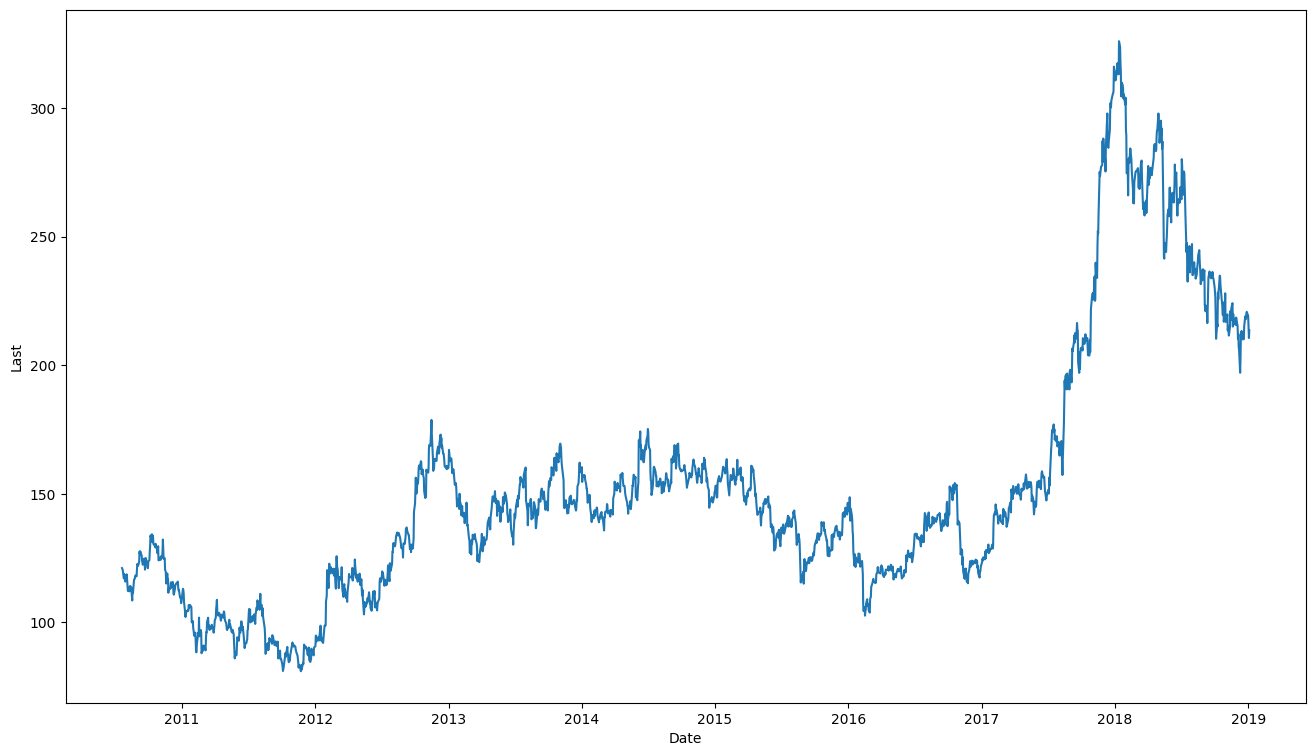

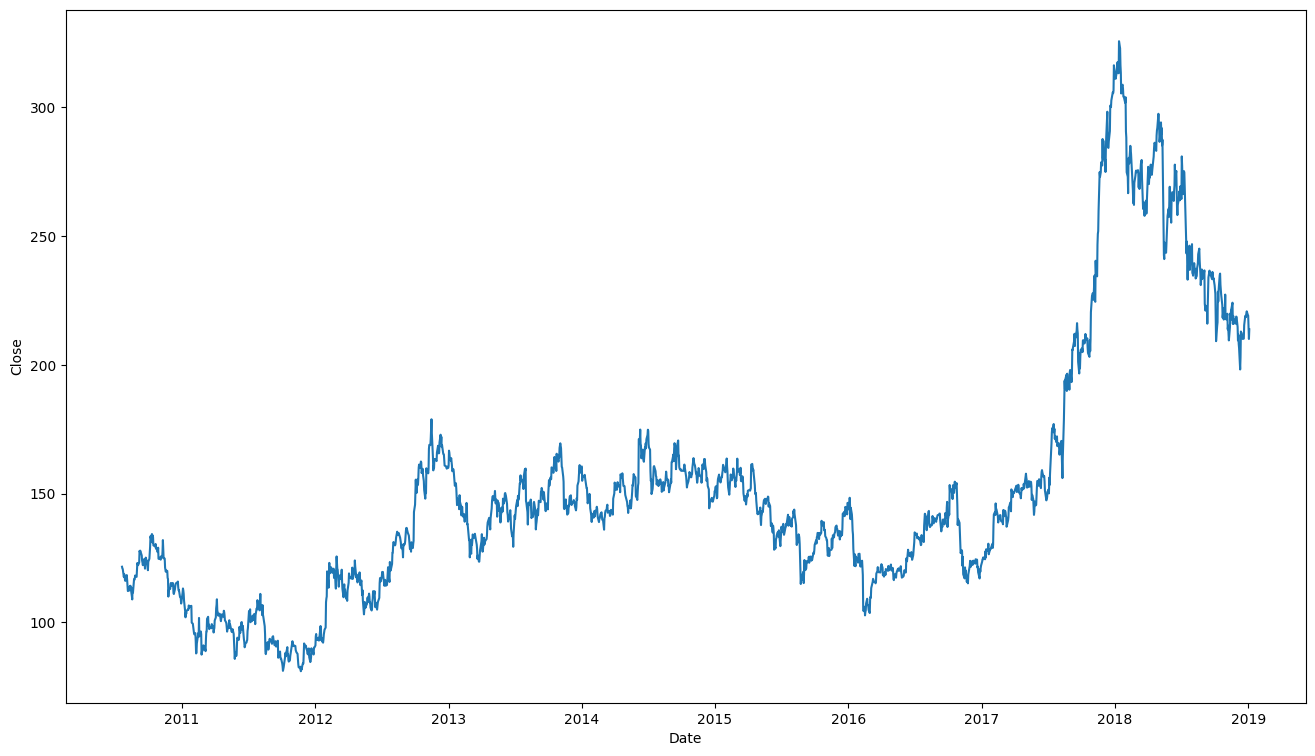

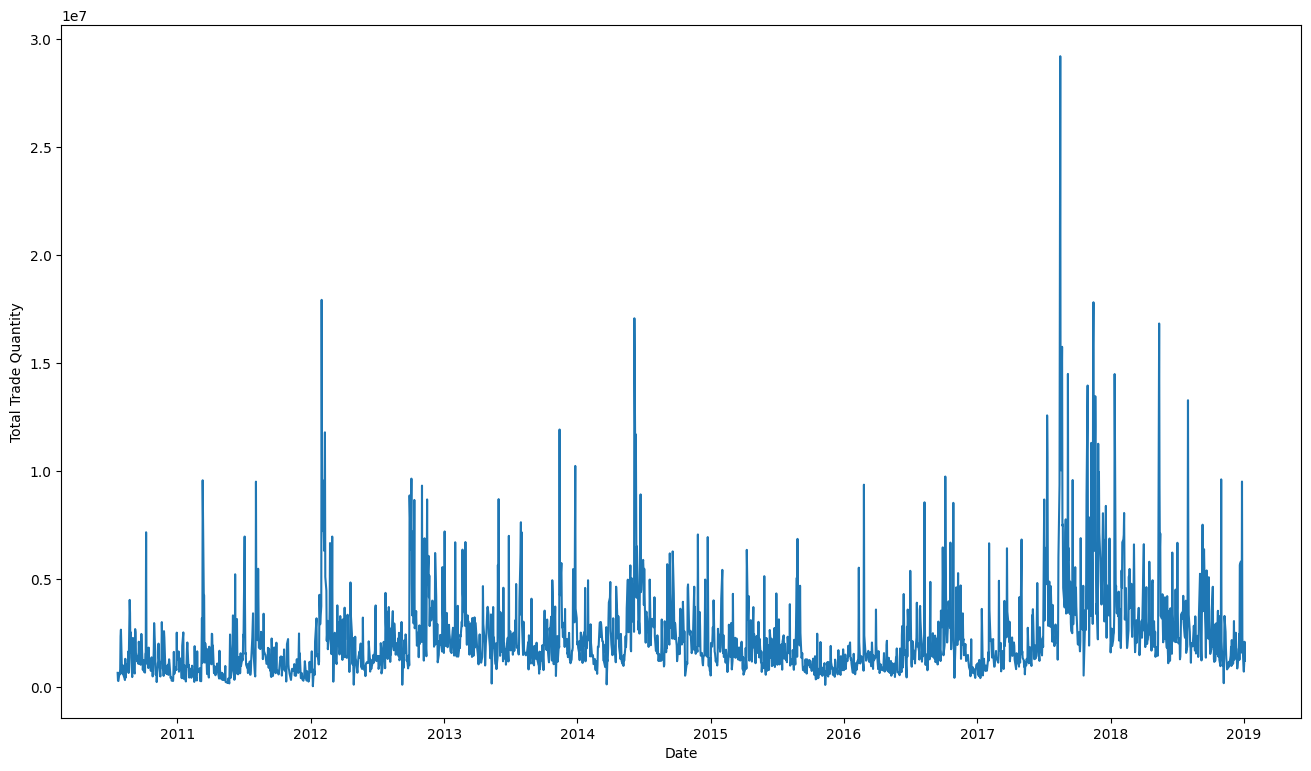

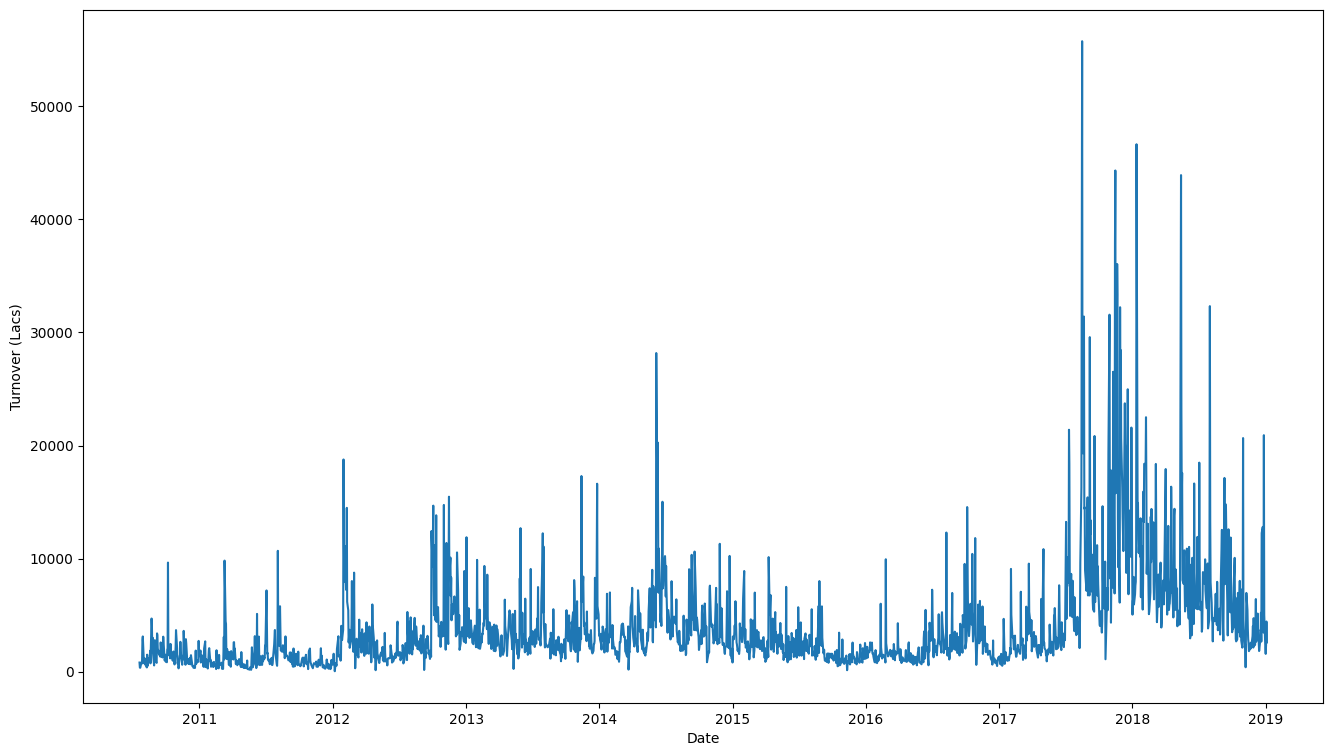

In [ ]:
for feature in data.columns:
  plt.figure(figsize=(16, 9))
  plt.xlabel("Date")
  plt.ylabel(feature)
  plt.plot(data[feature])
  plt.show()

In [ ]:
data['sma_50']= data['Close'].rolling(window=50).mean()
data['sma_200']= data['Close'].rolling(window=200).mean()

In [ ]:
#plotting SMA50 and SMA200 as they are important technical indicators

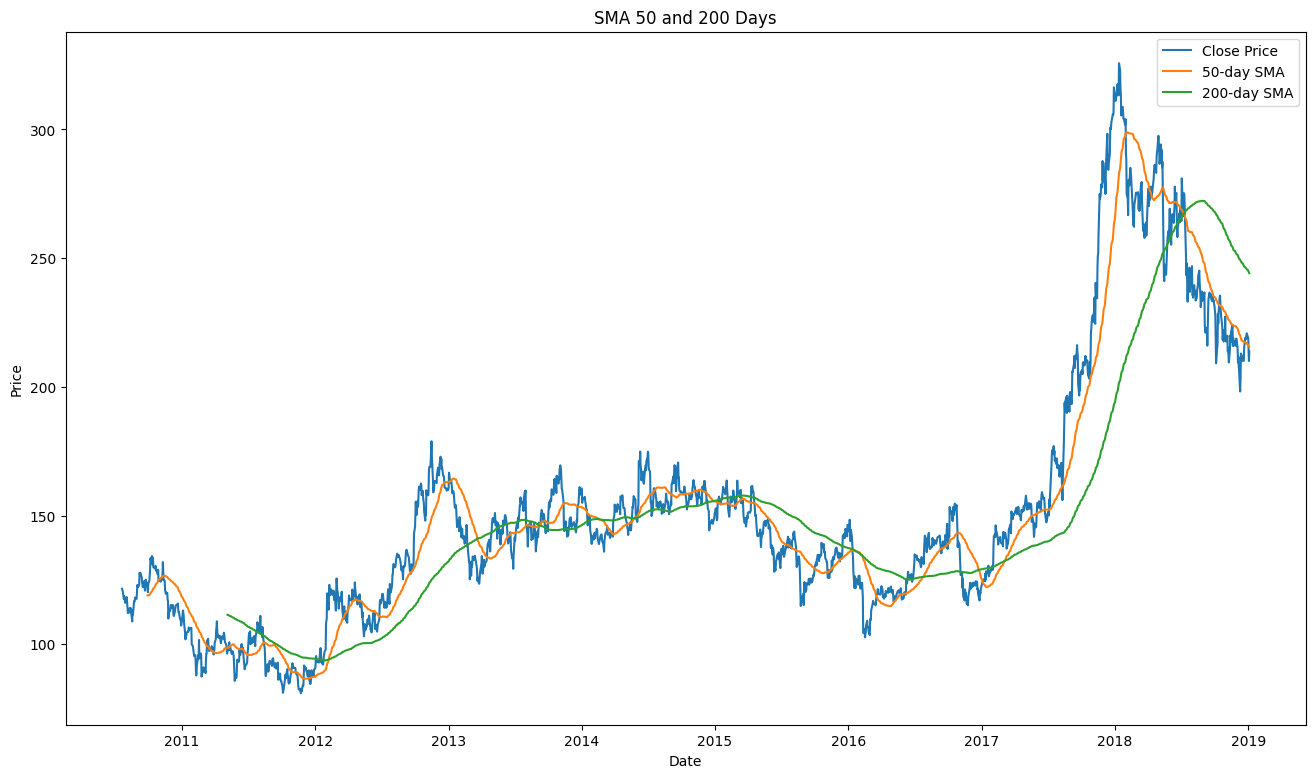

In [ ]:
sma_50 = data['Close'].rolling(window=50).mean()
sma_200 = data['Close'].rolling(window=200).mean()
plt.figure(figsize=(16, 9))
plt.plot(data['Close'], label='Close Price')
plt.plot(sma_50, label='50-day SMA')
plt.plot(sma_200, label='200-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SMA 50 and 200 Days')
plt.legend()
plt.show()

In [ ]:
#making a dataframe

In [ ]:
df=pd.DataFrame(data.values)
df.columns=data.columns

In [ ]:
#fixing nan values
#luckily this data has no missing values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = scaler.fit_transform(df)

In [ ]:
df=pd.DataFrame(df)
df.columns=data.columns
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),sma_50,sma_200
0,-0.602344,-0.621469,-0.582717,-0.616993,-0.607644,-0.802063,-0.685243,0.000000,0.000000
1,-0.638827,-0.641423,-0.599183,-0.624077,-0.620805,-0.977643,-0.783860,0.000000,0.000000
2,-0.608424,-0.642421,-0.599183,-0.632173,-0.625866,-0.983409,-0.787128,0.000000,0.000000
3,-0.642880,-0.661377,-0.664017,-0.697951,-0.687620,-0.802172,-0.690423,0.000000,0.000000
4,-0.693550,-0.691308,-0.768987,-0.663544,-0.666360,-0.836937,-0.709124,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2095,1.422440,1.386894,1.430228,1.375575,1.373523,-0.654435,-0.393274,1.359621,2.310195
2096,1.380890,1.335014,1.413763,1.363431,1.367449,-0.774378,-0.516319,1.354615,2.304280
2097,1.361636,1.321046,1.322172,1.267294,1.276337,-0.598728,-0.347260,1.349360,2.296898
2098,1.279550,1.221277,1.246017,1.193421,1.184214,-0.111055,0.113104,1.343853,2.288712


In [ ]:
y=data['Close']

In [ ]:
X=df.drop('Close',axis=1)

In [ ]:
X

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs),sma_50,sma_200
0,-0.602344,-0.621469,-0.582717,-0.616993,-0.802063,-0.685243,0.000000,0.000000
1,-0.638827,-0.641423,-0.599183,-0.624077,-0.977643,-0.783860,0.000000,0.000000
2,-0.608424,-0.642421,-0.599183,-0.632173,-0.983409,-0.787128,0.000000,0.000000
3,-0.642880,-0.661377,-0.664017,-0.697951,-0.802172,-0.690423,0.000000,0.000000
4,-0.693550,-0.691308,-0.768987,-0.663544,-0.836937,-0.709124,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2095,1.422440,1.386894,1.430228,1.375575,-0.654435,-0.393274,1.359621,2.310195
2096,1.380890,1.335014,1.413763,1.363431,-0.774378,-0.516319,1.354615,2.304280
2097,1.361636,1.321046,1.322172,1.267294,-0.598728,-0.347260,1.349360,2.296898
2098,1.279550,1.221277,1.246017,1.193421,-0.111055,0.113104,1.343853,2.288712


In [ ]:
y

,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65
...,...
2018-12-31,219.40
2019-01-01,219.10
2019-01-02,214.60


In [ ]:
X.shape

(2100, 8)

In [ ]:
y.shape

(2100,)

In [ ]:
#splitting data into train, val, test set

In [ ]:
X_train,y_train=X[1500:],y[1500:]
X_val,y_val=X[1500:1700],y[1500:1700]
X_test,y_test=X[1700:],y[1700:]

In [ ]:
#using LSTM model for stock prediction since events long ago may have effect on stock prices today

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential([layers.Input((8,1)),
                  layers.LSTM(64),
                  layers.Dense(32),
                  layers.Dense(32),
                  layers.Dense(1)])

In [ ]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error'])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 43690.4922 - mean_absolute_error: 200.7898 - val_loss: 19220.8984 - val_mean_absolute_error: 138.2115
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 43101.7305 - mean_absolute_error: 200.1830 - val_loss: 17623.4277 - val_mean_absolute_error: 132.6083
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27993.1621 - mean_absolute_error: 160.5481 - val_loss: 2915.3047 - val_mean_absolute_error: 48.9377
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9125.1045 - mean_absolute_error: 79.1389 - val_loss: 4305.0054 - val_mean_absolute_error: 64.9428
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3441.8159 - mean_absolute_error: 50.9215 - val_loss: 5183.1035 - val_mean_absolute_error: 71.6513
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2898.2175 - mean_absolute_error: 46.2199 - val_loss: 2520.3076 - val_mean_absolute_error: 47.5990
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/st

In [ ]:
#plotting predicted train values alongside real ones for comparision

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


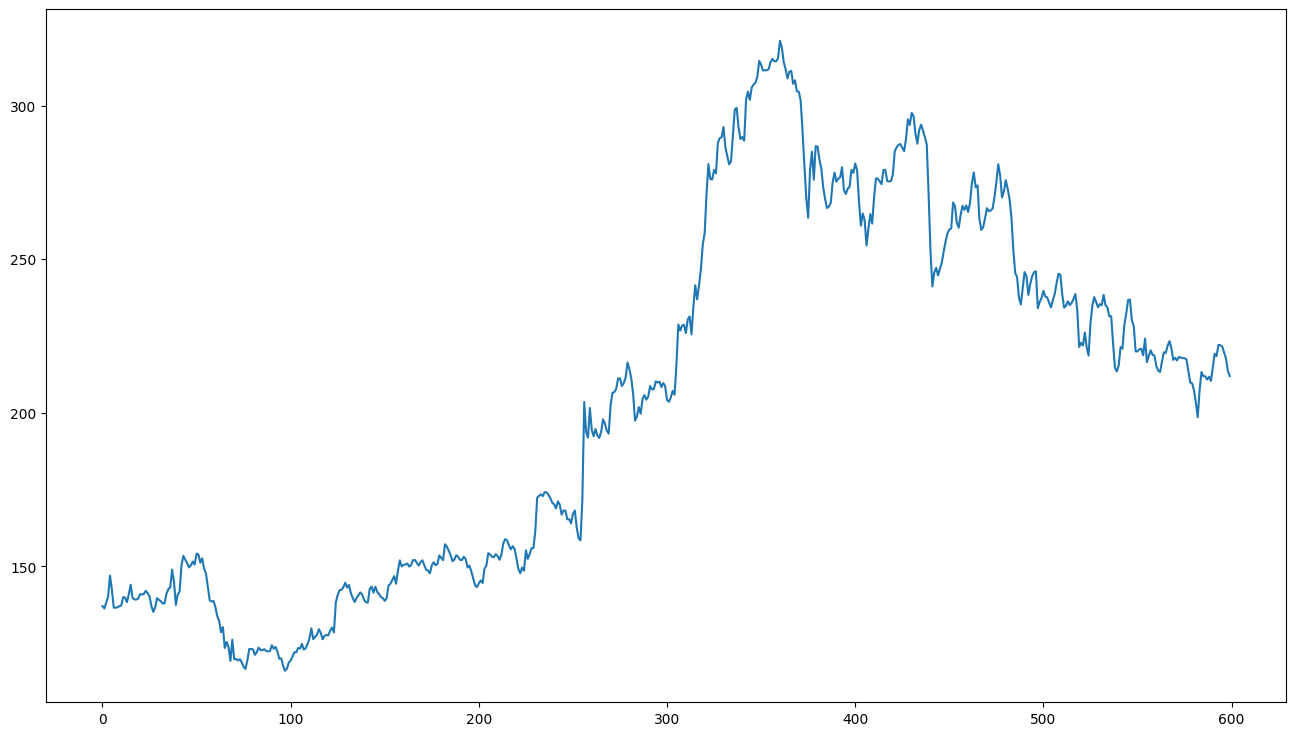

In [ ]:
training_predict=model.predict(X_train)
plt.figure(figsize=(16, 9))
plt.plot(training_predict)

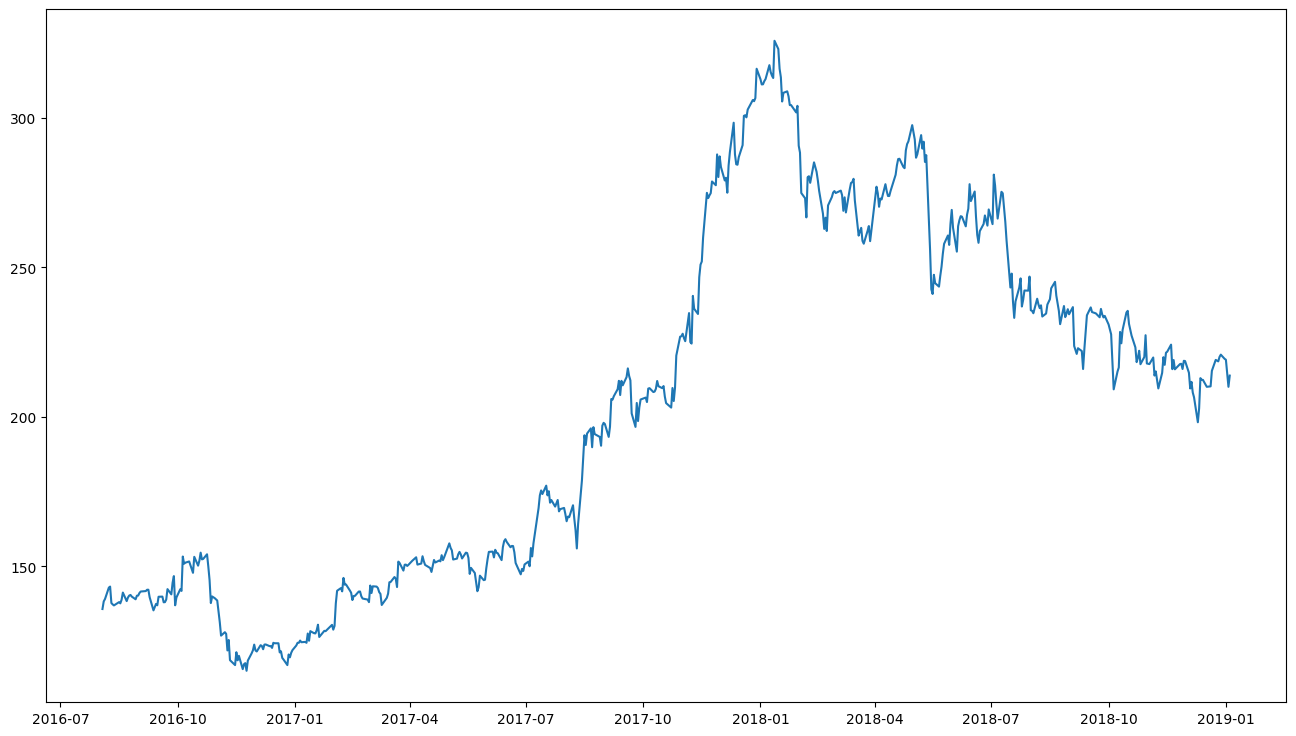

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(y_train)

In [ ]:
#Evaluate model performance on train

In [ ]:
train_loss, train_mae = model.evaluate(X_train, y_train)
print(f"Loss: {train_loss}, MAE: {train_mae}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8224 - mean_absolute_error: 1.7213
Loss: 8.63379955291748, MAE: 2.1225030422210693


In [ ]:
#plotting predicted val values alongside real ones for comparision

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


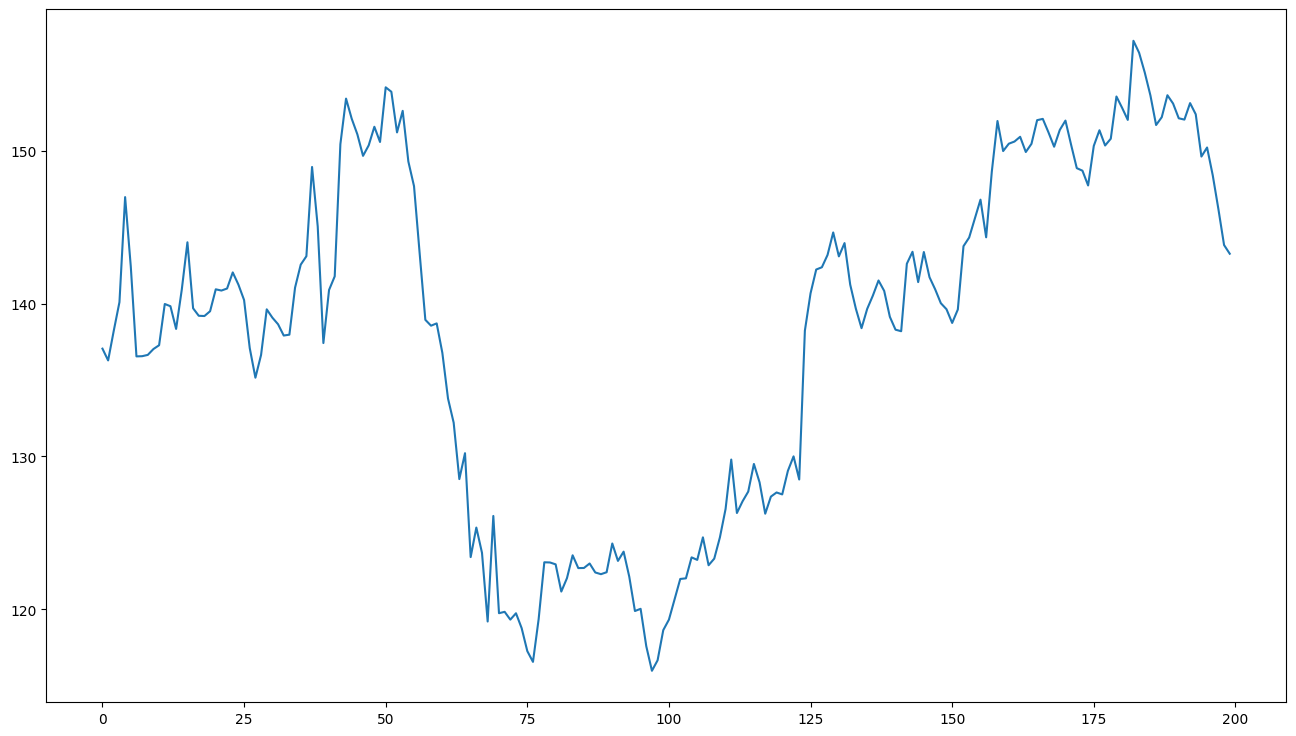

In [ ]:
val_predict=model.predict(X_val)
plt.figure(figsize=(16, 9))
plt.plot(val_predict)

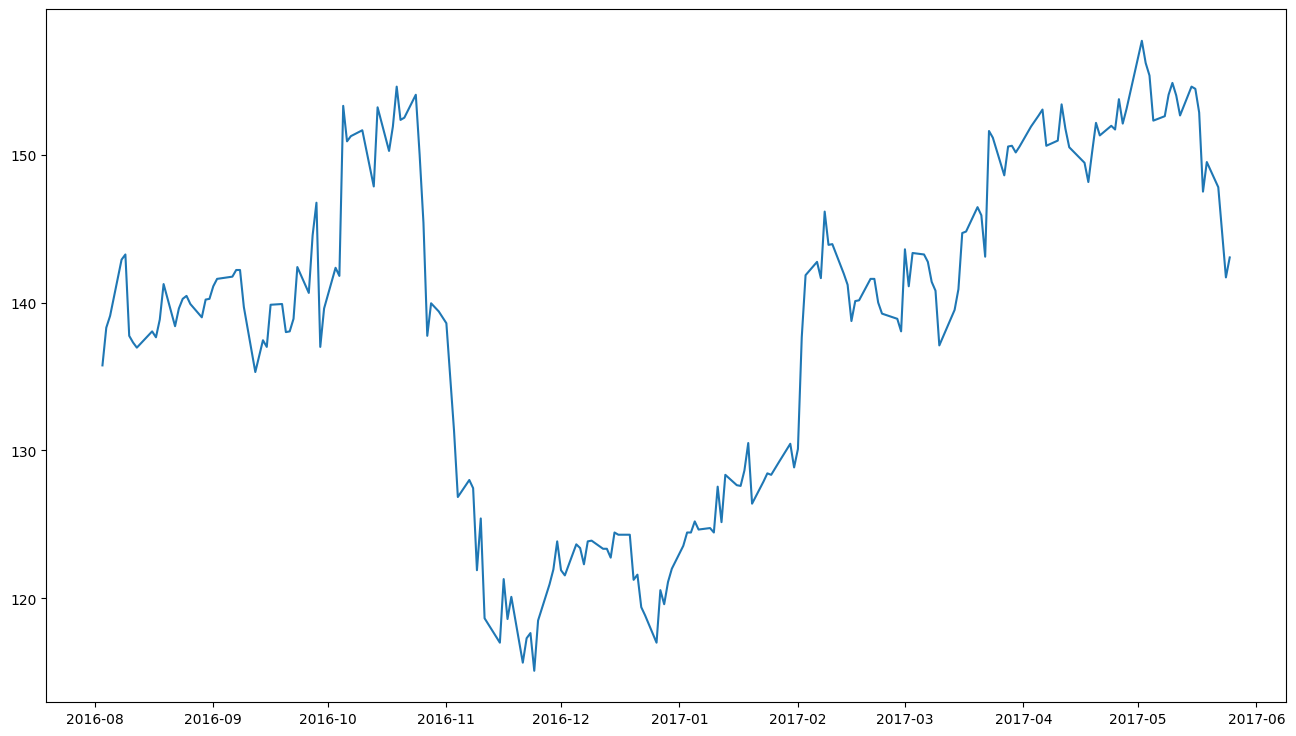

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(y_val)

In [ ]:
#Evaluate model performance on val

In [ ]:
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f"Loss: {val_loss}, MAE: {val_mae}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4007 - mean_absolute_error: 1.3857 
Loss: 2.92756724357605, MAE: 1.302618145942688


In [ ]:
#plotting predicted test values alongside real ones for comparision

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


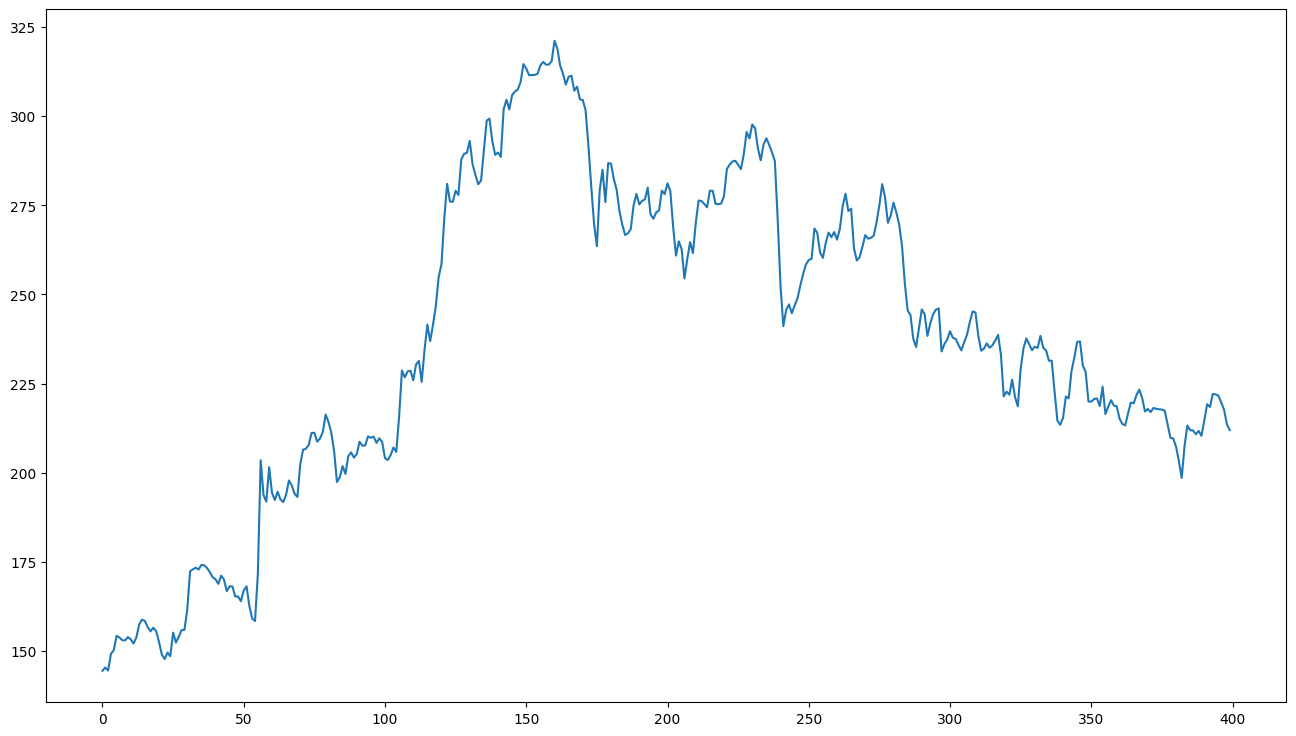

In [ ]:
test_predict=model.predict(X_test)
plt.figure(figsize=(16, 9))
plt.plot(test_predict)

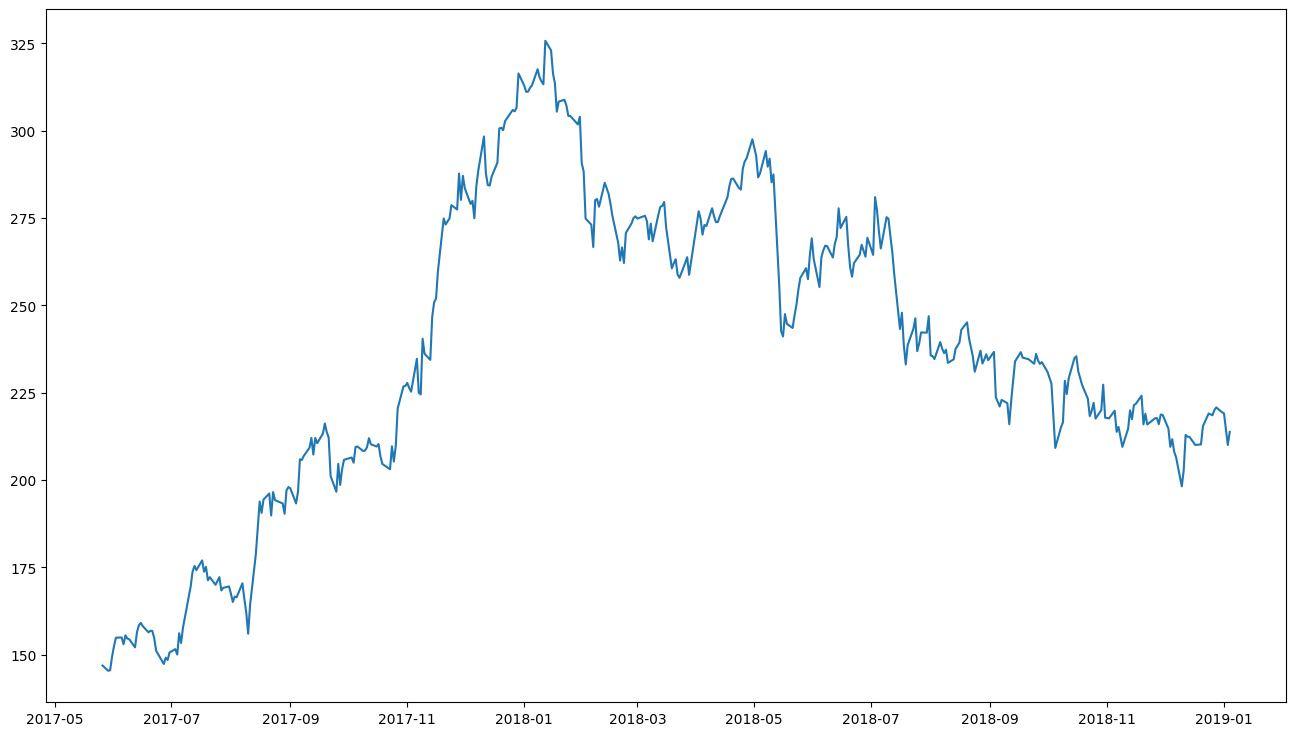

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(y_test)

In [ ]:
#Evaluate model performance on test

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Loss: {test_loss}, MAE: {test_mae}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9817 - mean_absolute_error: 3.2458
Loss: 19.770851135253906, MAE: 3.4893505573272705
